In [1]:
import sys, os
sys.path.append(os.path.normpath(os.path.join(os.getcwd(), '..')))
sys.path.append(os.path.normpath(os.path.join(os.getcwd(), '..', 'external', 'MiDaS')))

import pandas as pd

import matplotlib.pyplot as plt
import pickle

In [2]:
with open('/runai-ivrl-scratch/students/2021-fall-sp-jellouli/output/eval.pickle', 'rb') as handle:
    res = pickle.load(handle)
with open('/runai-ivrl-scratch/students/2021-fall-sp-jellouli/output/baseline_res.pickle', 'rb') as handle:
    baseline_res = pickle.load(handle)

In [3]:
df = pd.DataFrame.from_dict(res, orient='index')

In [4]:
df = df.drop('/runai-ivrl-scratch/students/2021-fall-sp-jellouli/output/model_final.pth')

In [5]:
import re
def get_iter(path):
    name = os.path.basename(path)
    iteration =  re.fullmatch(r"model_(?P<iteration>[0-9]{7}).pth", name)['iteration']
    return int(iteration)

df.index = df.index.map(get_iter)
df.index = df.index.rename('iteration')

In [6]:
df = df.apply(lambda r: r['bbox'], axis=1, result_type='expand')

In [7]:
best_model =  df.iloc[df['AP'].argmax()]

In [11]:
df

,AP,AP50,AP75,APs,APm,APl,AP-person,AP-bicycle,AP-car,AP-motorcycle,...,AP-toaster,AP-sink,AP-refrigerator,AP-book,AP-clock,AP-vase,AP-scissors,AP-teddy bear,AP-hair drier,AP-toothbrush
iteration,,,,,,,,,,,,,,,,,,,,,
4999,28.822120,51.221954,30.148398,16.751939,32.349274,37.330468,43.205707,22.712568,34.634708,33.112822,...,0.000000,27.319456,38.628973,9.115886,38.696774,27.198768,19.905764,22.778086,0.000000,15.069492
9999,30.983422,52.682037,33.292220,16.462545,34.722994,41.237619,47.974438,24.838787,34.364139,35.161394,...,0.000000,27.004763,42.339461,8.830031,41.568333,18.971270,16.133300,35.566227,0.000000,14.648826
14999,31.565720,53.373996,34.322805,17.273168,34.850562,41.161222,43.033095,22.805272,33.014483,34.538556,...,0.000000,27.807214,44.344892,9.869511,40.818830,26.648913,17.457132,33.931417,0.000000,12.834870
19999,32.245715,53.838073,35.053327,18.202267,35.550453,42.074316,47.749950,24.940750,37.036939,32.047004,...,0.000000,30.214525,44.801192,11.364957,38.756066,29.163516,19.234125,33.091703,0.000000,13.523331
24999,32.098099,54.944004,34.554462,17.223734,36.001096,41.918074,45.618949,24.480481,36.977588,30.609197,...,8.316832,31.136194,43.614025,11.345037,41.488029,29.070801,18.648827,36.131806,0.000000,15.267963
29999,32.857721,54.191577,35.889673,17.808245,36.181837,43.688934,47.982319,25.625021,38.037711,32.984208,...,10.693069,28.110786,45.219501,10.930238,42.191707,30.269102,18.300213,32.110847,0.000000,17.510971
34999,32.717837,54.458503,35.739771,17.897035,36.210701,43.540531,48.599272,24.697457,35.055378,34.559921,...,4.158416,29.018215,43.905279,10.054625,40.330619,32.226669,18.945916,37.567137,0.000000,14.652438
39999,33.628193,55.010678,36.930187,18.447452,37.138213,44.314989,47.751061,25.179650,38.752076,35.099302,...,33.217822,32.484435,46.239355,10.005021,41.315245,30.175404,21.490553,36.288997,0.000000,14.480861
44999,32.858557,53.607851,36.078422,16.584694,36.511892,43.885241,49.140741,22.491783,38.945727,37.047388,...,0.000000,30.499696,44.988254,9.170302,41.587300,28.819923,22.262415,35.628718,1.188119,17.202682


In [10]:
best_model

AP               37.729803
AP50             57.774996
AP75             41.272465
APs              20.744541
APm              41.106002
                   ...    
AP-vase          32.698310
AP-scissors      24.406791
AP-teddy bear    41.044717
AP-hair drier     1.084394
AP-toothbrush    19.728599
Name: 254999, Length: 86, dtype: float64

In [9]:
baseline_res

OrderedDict([('bbox',
              {'AP': 42.03581017257405,
               'AP50': 62.48036912310654,
               'AP75': 45.876350237476615,
               'APs': 25.224745604807286,
               'APm': 45.55448318741472,
               'APl': 54.59228817530841,
               'AP-person': 55.66934451351783,
               'AP-bicycle': 32.05708983253262,
               'AP-car': 45.34067453578562,
               'AP-motorcycle': 44.379844606597594,
               'AP-airplane': 64.63408643437634,
               'AP-bus': 64.54604304220477,
               'AP-train': 61.38231789979005,
               'AP-truck': 36.05001391718359,
               'AP-boat': 29.23997532741164,
               'AP-traffic light': 28.498601905068927,
               'AP-fire hydrant': 68.2644284524556,
               'AP-stop sign': 65.69035326170297,
               'AP-parking meter': 48.33999631332529,
               'AP-bench': 24.527919620506925,
               'AP-bird': 35.77530757749049,
     

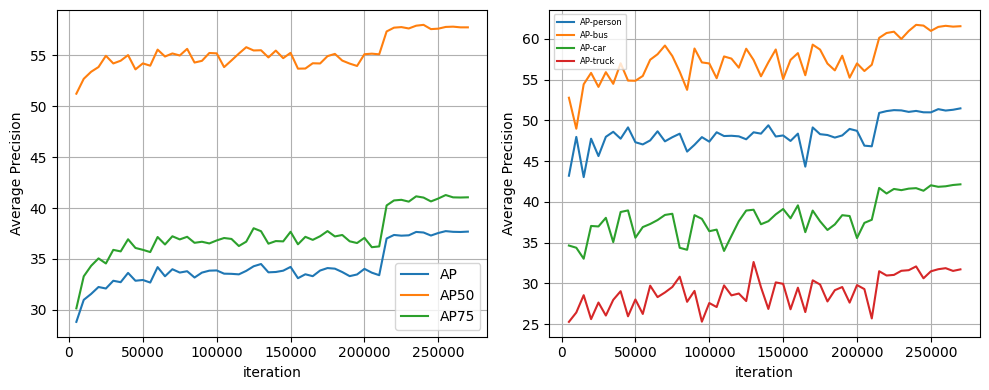

In [59]:
fig, axs = plt.subplots(1, 2, figsize=(10,4), dpi=100)
# axs[0].set_title('AP, AP50, AP75 vs iteration')
axs[0].plot(df.index, df['AP'].values, label='AP')
axs[0].plot(df.index, df['AP50'].values, label='AP50')
axs[0].plot(df.index, df['AP75'].values, label='AP75')
axs[0].set_xlabel('iteration')
axs[0].set_ylabel('Average Precision')
axs[0].grid(True)
axs[0].legend()
# axs[1].set_title('AP-person, AP-car, AP-bus Ap-Truck, vs iteration')
axs[1].plot(df.index, df['AP-person'].values, label='AP-person')
axs[1].plot(df.index, df['AP-bus'].values, label='AP-bus')

axs[1].plot(df.index, df['AP-car'].values, label='AP-car')
axs[1].plot(df.index, df['AP-truck'].values, label='AP-truck')
axs[1].set_xlabel('iteration')
axs[1].set_ylabel('Average Precision')
axs[1].grid(True)
axs[1].legend(loc='upper left',  prop={'size': 6})

fig.tight_layout()
plt.savefig('AP.jpg')
# plt.show()

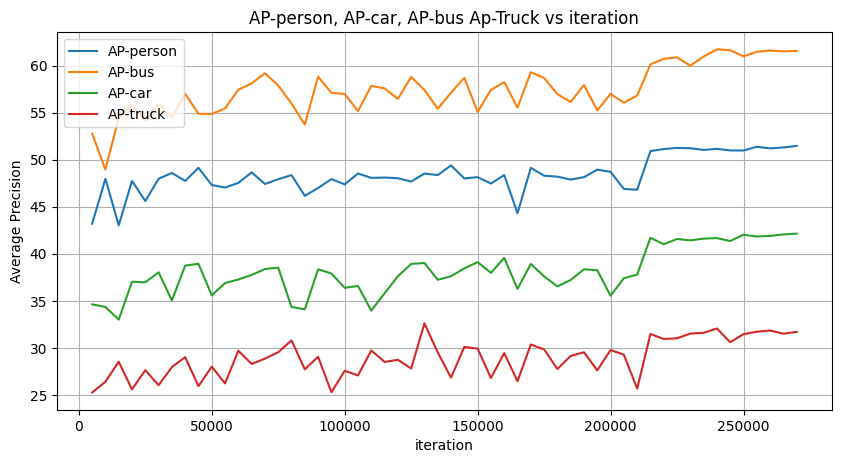

In [44]:
plt.figure(figsize=(10,5), dpi=100)
plt.title('AP-person, AP-car, AP-bus Ap-Truck, vs iteration')
plt.plot(df.index, df['AP-person'].values, label='AP-person')
plt.plot(df.index, df['AP-bus'].values, label='AP-bus')
plt.plot(df.index, df['AP-car'].values, label='AP-car')
plt.plot(df.index, df['AP-truck'].values, label='AP-truck')
plt.xlabel('iteration')
plt.ylabel('Average Precision')
plt.grid(True)
plt.legend()
plt.savefig('AP-examples.jpg')
plt.show()